In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
import seaborn as sns

In [6]:
#載入數據
bank_analysis=pd.read_csv('bank-additional.csv',sep=';',error_bad_lines=False)
bank_analysis.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
#查看數據結構
print(bank_analysis.shape)
print(bank_analysis.columns)

(4119, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [15]:
#查看是否有缺失值
bank_analysis.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

>查看各個特徵可視化

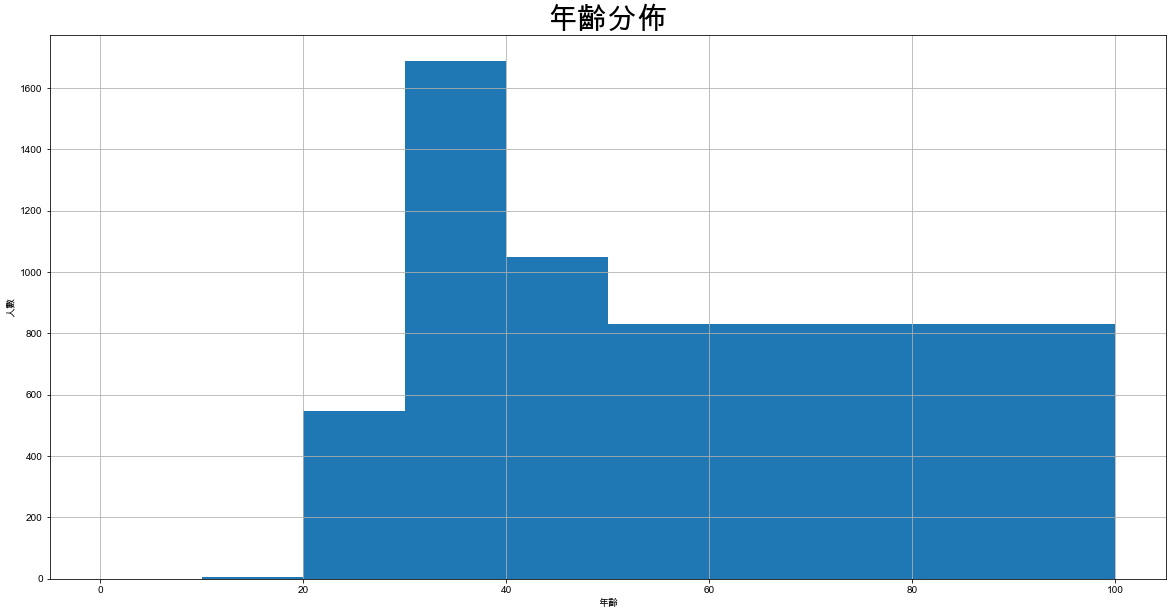

In [17]:
#年齡分佈
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
bank_analysis.age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('年齡分佈',fontsize=30)
plt.xlabel('年齡')
plt.ylabel('人數')
plt.show()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64


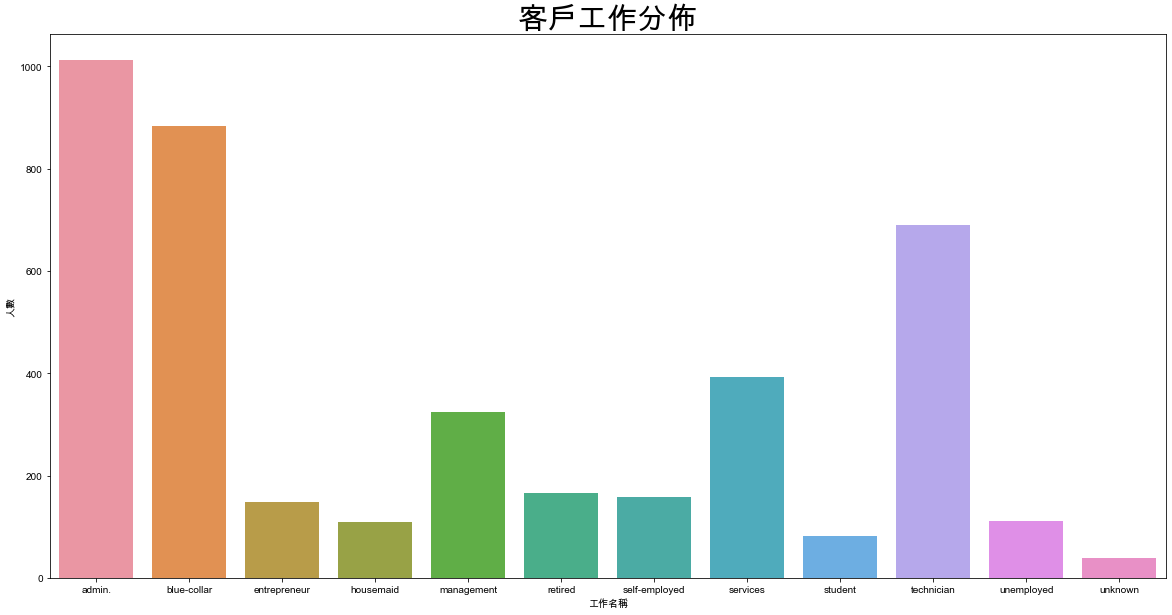

In [27]:
#工作狀況
bank_job=bank_analysis.groupby('job').count()
print(bank_analysis['job'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
sns.barplot(bank_job.index,bank_job.values[:,1])
plt.title('客戶工作分佈',fontsize=30)
plt.xlabel('工作名稱')
plt.ylabel('人數')
plt.show()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64


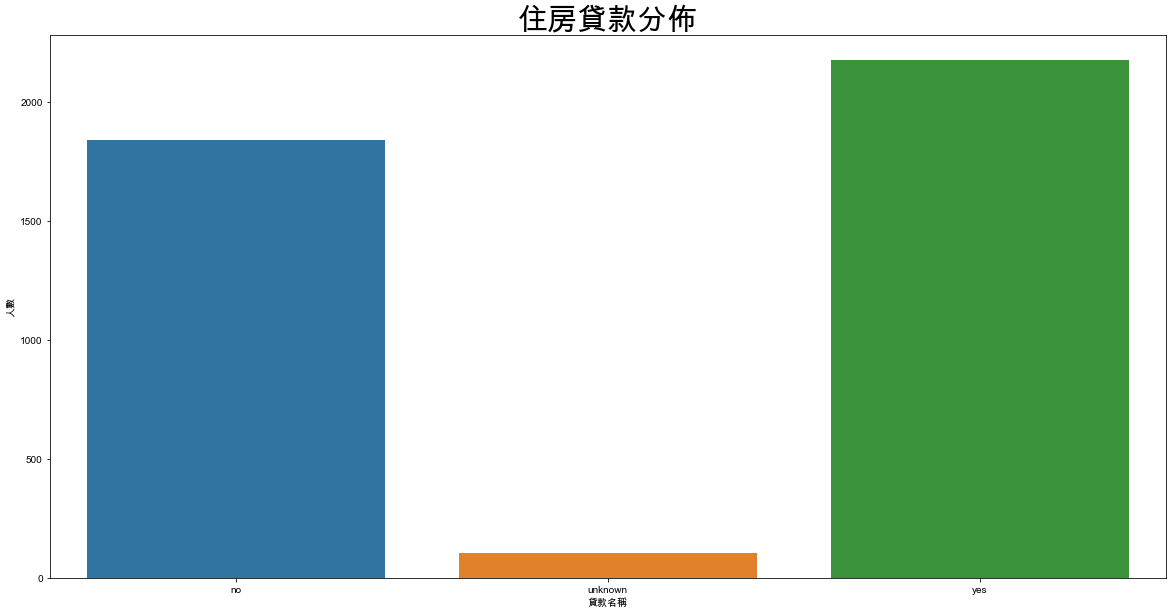

In [28]:
#住房貸款分佈
bank_housing=bank_analysis.groupby('housing').count()
print(bank_analysis['housing'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
sns.barplot(bank_housing.index,bank_housing.values[:,1])
plt.title('住房貸款分佈',fontsize=30)
plt.xlabel('貸款名稱')
plt.ylabel('人數')
plt.show()

no         3349
yes         665
unknown     105
Name: loan, dtype: int64


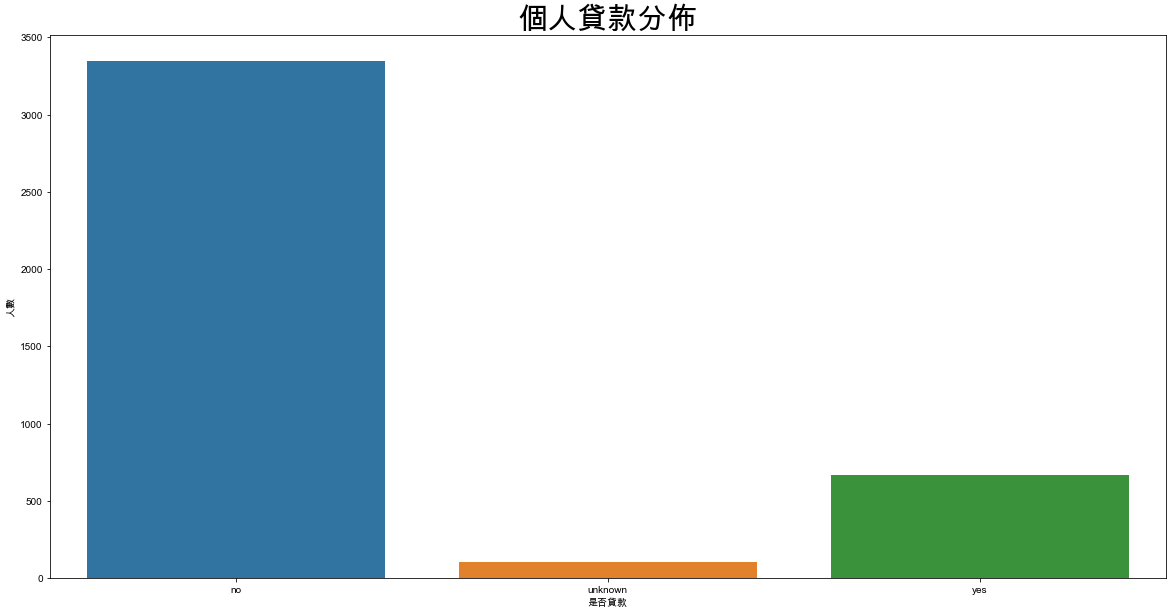

In [32]:
#個人貸款分佈
bank_loan=bank_analysis.groupby('loan').count()
print(bank_analysis['loan'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
sns.barplot(bank_loan.index,bank_loan.values[:,1])
plt.title('個人貸款分佈',fontsize=30)
plt.xlabel('是否貸款')
plt.ylabel('人數')
plt.show()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64


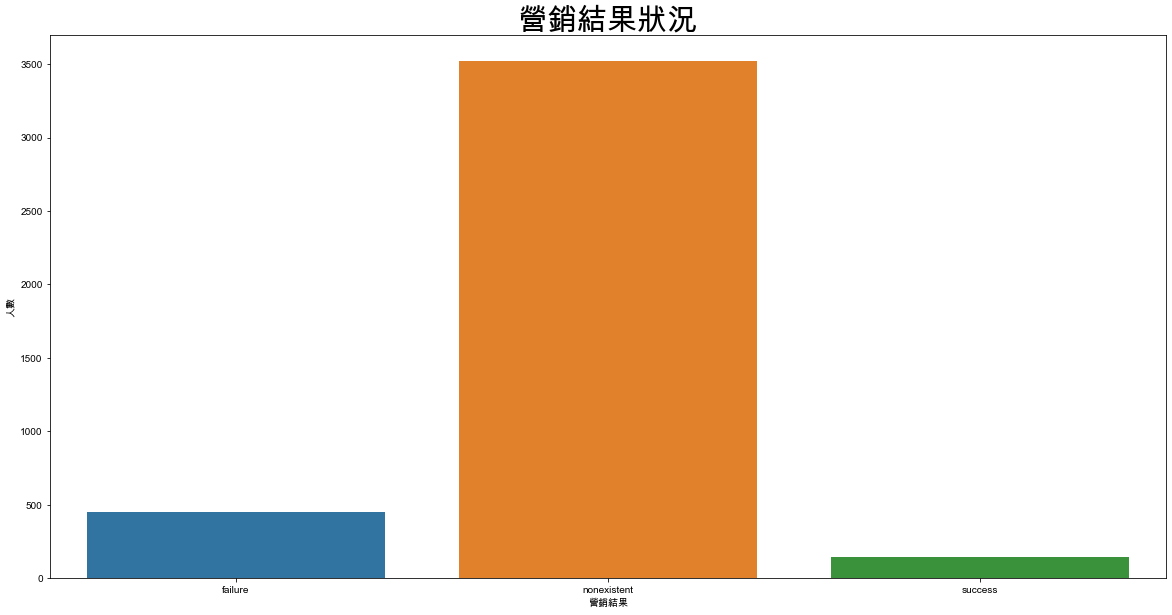

In [30]:
#營銷結果
bank_poutcome=bank_analysis.groupby('poutcome').count()
print(bank_analysis['poutcome'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
sns.barplot(bank_poutcome.index,bank_poutcome.values[:,1])
plt.title('營銷結果狀況',fontsize=30)
plt.xlabel('營銷結果')
plt.ylabel('人數')
plt.show()

>>沒有回應以及失敗比例非常高

>查看是什麼原因造成這結果

999    3959
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
9         3
1         3
13        2
18        2
16        2
15        2
0         2
14        1
19        1
21        1
17        1
11        1
Name: pdays, dtype: int64


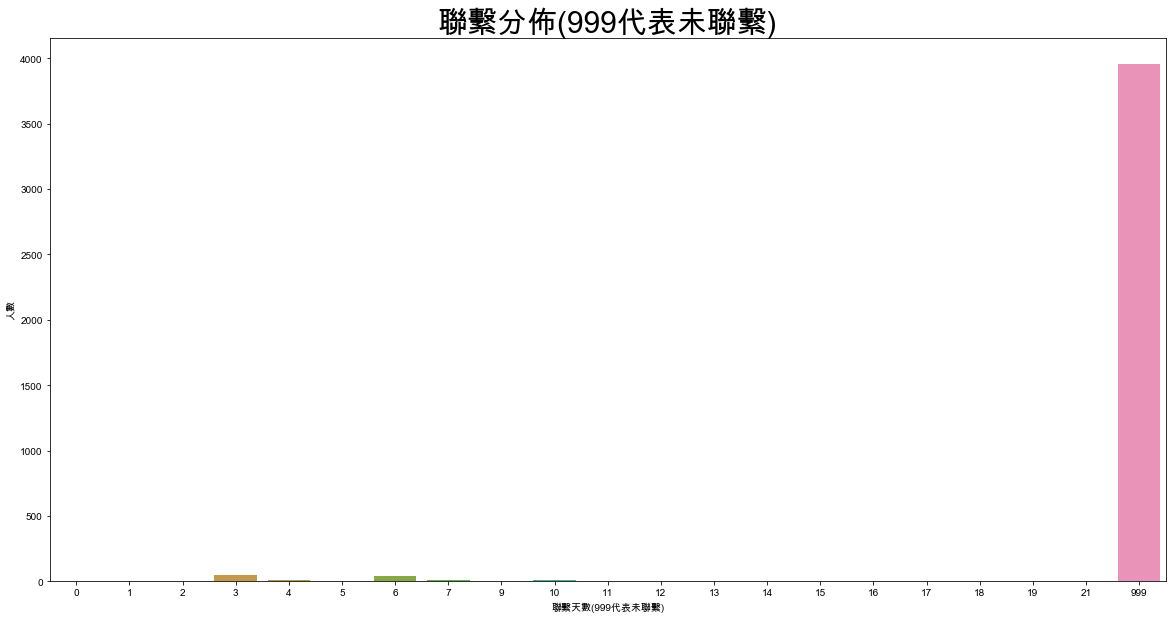

In [63]:
#看聯繫次數對營銷結果
bank_Marketing=bank_analysis.groupby('pdays').count()
print(bank_analysis['pdays'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
sns.barplot(bank_Marketing.index,bank_Marketing.values[:,1])
plt.title('聯繫分佈(999代表未聯繫)',fontsize=30)
plt.xlabel('聯繫天數(999代表未聯繫)')
plt.ylabel('人數')
plt.show()

0    3523
1     475
2      78
3      25
4      14
6       2
5       2
Name: previous, dtype: int64


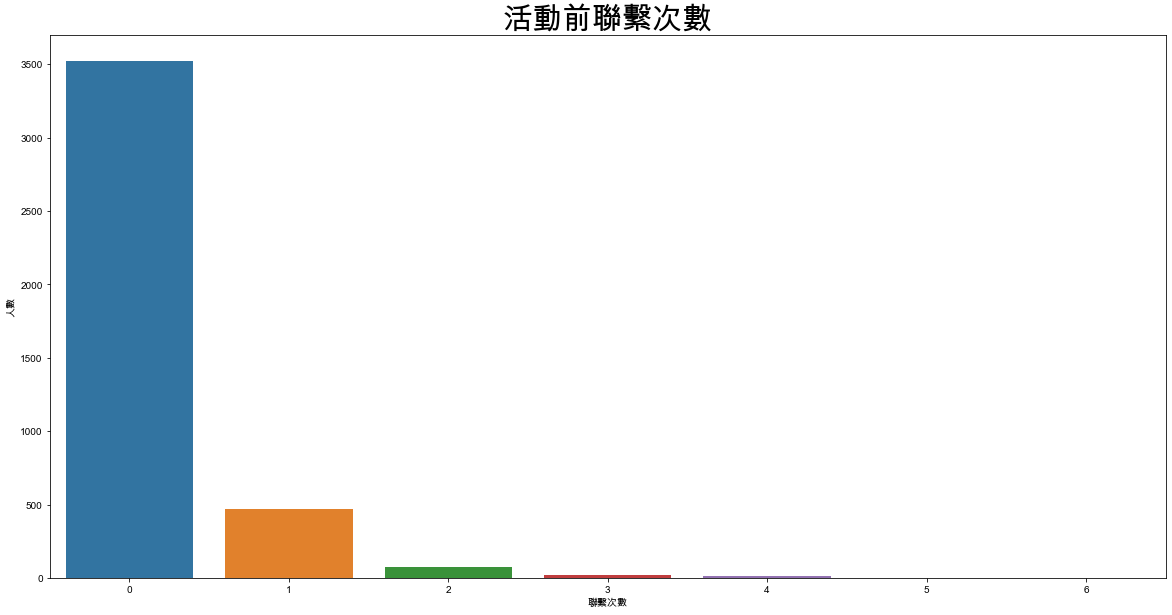

In [81]:
#活動前聯繫次數
bank_previous=bank_analysis.groupby('previous').count()
print(bank_analysis['previous'].value_counts())
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
sns.barplot(bank_previous.index,bank_previous.values[:,1])
plt.title('活動前聯繫次數',fontsize=30)
plt.xlabel('聯繫次數')
plt.ylabel('人數')
plt.show()

In [74]:
#聯繫持續時間，以秒為單位
bank_duration=bank_analysis.groupby('duration').count()
alla=bank_analysis['duration'].value_counts()
print(alla.index.max())
print(alla.index.min())

3643
0


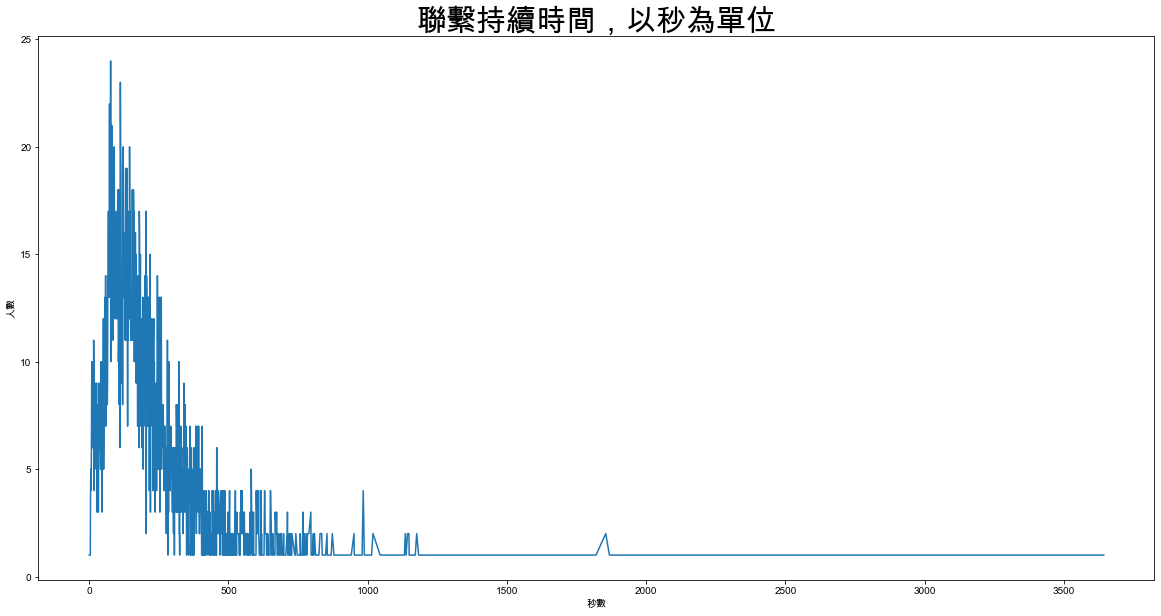

In [76]:
plt.figure(figsize=(20,10),facecolor='w',edgecolor='k')
plt.plot(bank_duration.index,bank_duration.values[:,1])
plt.title('聯繫持續時間，以秒為單位',fontsize=30)
plt.xlabel('秒數')
plt.ylabel('人數')
plt.show()

>>分析聯繫結果對於營銷結果影響

In [85]:
#nonexistent
df_nonexistent=bank_analysis.loc[bank_analysis['poutcome']=='nonexistent']
print(df_nonexistent['pdays'].value_counts())

999    3523
Name: pdays, dtype: int64


In [86]:
#failure
df_failure=bank_analysis.loc[bank_analysis['poutcome']=='failure']
print(df_failure['pdays'].value_counts())

999    436
6        3
18       2
10       2
9        2
3        2
21       1
17       1
15       1
14       1
13       1
12       1
7        1
Name: pdays, dtype: int64


In [87]:
#success
df_success=bank_analysis.loc[bank_analysis['poutcome']=='success']
print(df_success['pdays'].value_counts())

3     50
6     39
4     14
7      9
10     6
12     4
5      4
2      4
1      3
16     2
0      2
19     1
15     1
13     1
11     1
9      1
Name: pdays, dtype: int64


>>活動前聯繫對於客戶的影響

In [89]:
#nonexistent
df_nonexistentpre=bank_analysis.loc[bank_analysis['poutcome']=='nonexistent']
print(df_nonexistent['previous'].value_counts())

0    3523
Name: previous, dtype: int64


In [90]:
#failure
df_failurepre=bank_analysis.loc[bank_analysis['poutcome']=='failure']
print(df_failure['previous'].value_counts())

1    384
2     53
3      9
4      8
Name: previous, dtype: int64


In [91]:
#success
df_successpre=bank_analysis.loc[bank_analysis['poutcome']=='success']
print(df_success['previous'].value_counts())

1    91
2    25
3    16
4     6
6     2
5     2
Name: previous, dtype: int64


>>分析訂閱結果

In [94]:
bank_y=bank_analysis.groupby('y').count()
print(bank_analysis['y'].value_counts())
print()
print(bank_analysis['poutcome'].value_counts())

no     3668
yes     451
Name: y, dtype: int64

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64


>>分析聯繫結果對於訂閱結果影響

In [95]:
#no
dfy_no=bank_analysis.loc[bank_analysis['y']=='no']
print(dfy_no['pdays'].value_counts())

999    3608
6        15
3        13
4         9
1         3
2         3
9         2
7         2
16        2
12        2
10        2
13        2
11        1
17        1
18        1
14        1
15        1
Name: pdays, dtype: int64


In [96]:
#yes
dfy_yes=bank_analysis.loc[bank_analysis['y']=='yes']
print(dfy_yes['pdays'].value_counts())

999    351
3       39
6       27
7        8
10       6
4        5
5        4
12       3
0        2
21       1
19       1
18       1
15       1
9        1
2        1
Name: pdays, dtype: int64
